# SD701 Lab session: classification and clustering

The goal of this lab session is for you to get a good grasp of data cleaning, clustering, classification implementations and evaluations. For this reason, the lab is less focused on re-implementing existing algorithms, and more onto using what is already available and making sense of it.

Let us make our imports.

In [1]:
import random
from sklearn.preprocessing import label_binarize
import plotly.express as px
from sklearn.cluster import DBSCAN
import sklearn as sk
import numpy as np
from sklearn import cluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_blobs
from random import shuffle
import plotly.graph_objs as go
from sklearn.metrics import plot_confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## The Palmer Penguin dataset

Let us look at the [Palmer penguins]() dataset. It is a small dataset that contains measurements about real-world penguins.

Our task is to:

   - Do an exploratory analysis of the data
   - Think about what algorithms and features we want to use, and how we need to transform our variables
   - Run our algorithms and evaluate them

In [2]:
#
penguins_cs = pd.read_csv(open("data/penguins_size.csv"))

### Exploratory analysis

In [3]:
# look at the original dataset
penguins_cs

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
penguins_cs.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
# set the row with "." in sex to nan
mask_point = penguins_cs.sex == '.'
penguins_cs[mask_point]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [6]:
is_NaN = penguins_cs.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = penguins_cs[row_has_NaN]
rows_with_NaN


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [7]:
penguins_clean = penguins_cs.dropna(thresh = 3)
penguins_clean

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


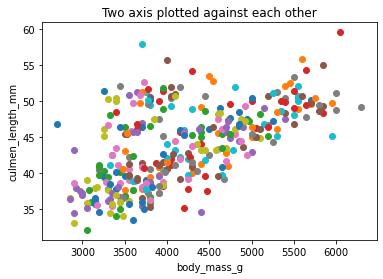

In [8]:
x = [penguins_cs['body_mass_g']]
y = [penguins_cs['culmen_length_mm']]
plt.plot(x, y, 'o');
# Add title and axis names
plt.title('Two axis plotted against each other')
plt.xlabel('body_mass_g')
plt.ylabel('culmen_length_mm')
plt.show();

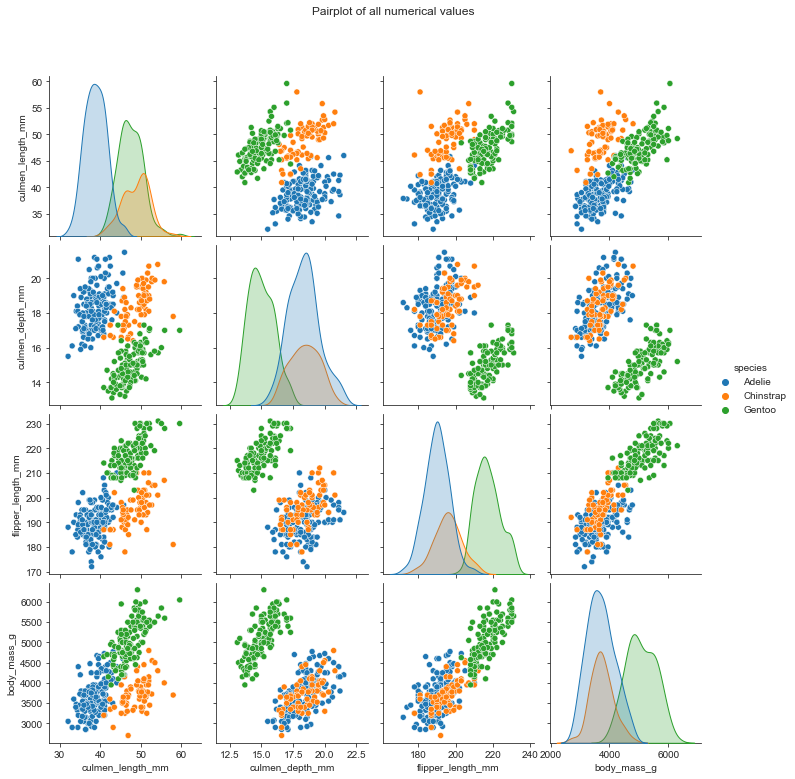

In [9]:
sns.set_style("ticks")
g = sns.pairplot(penguins_cs,hue='species')
_=g.fig.suptitle("Pairplot of all numerical values", y=1.08)


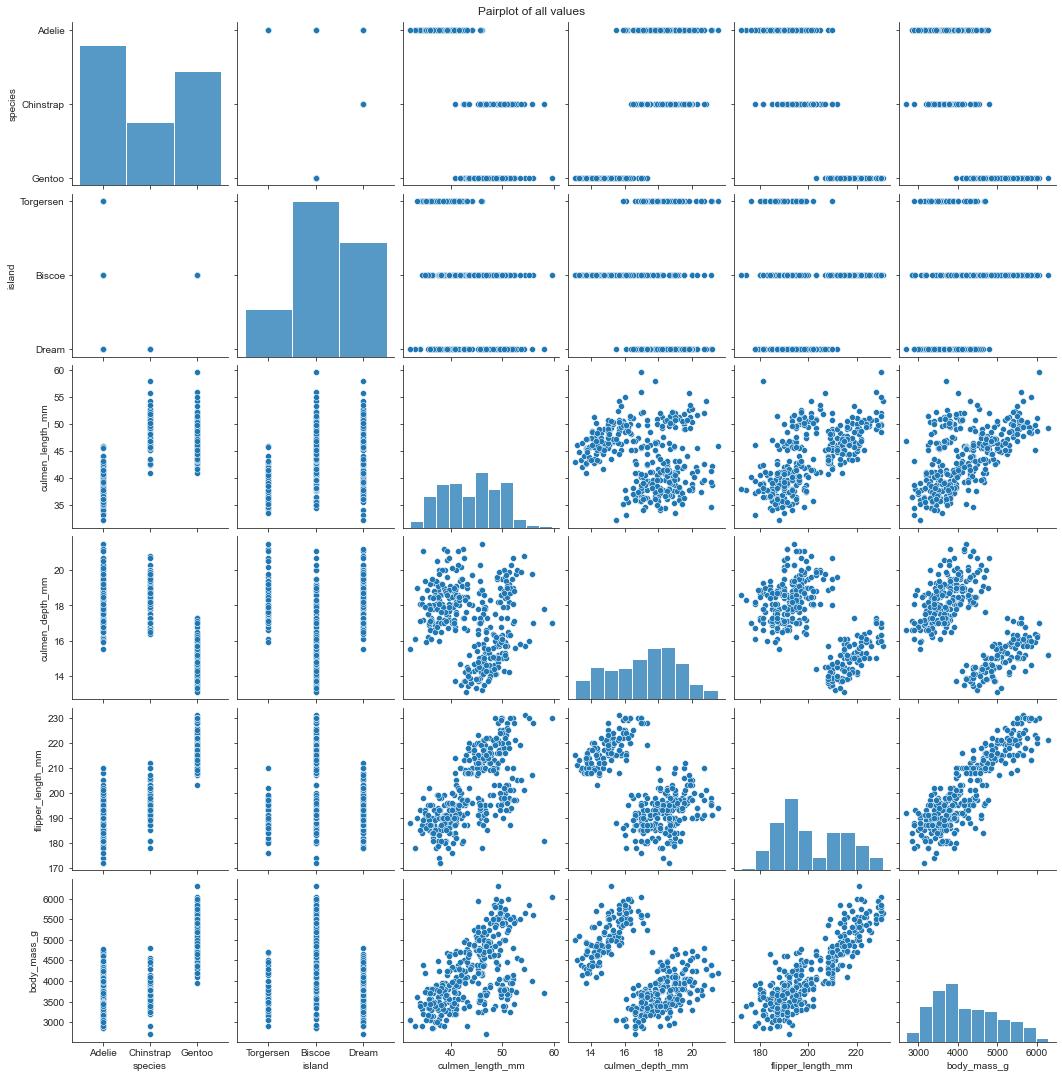

In [10]:
sns.set_style("ticks")
g = sns.pairplot(penguins_cs,vars=['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g'])
_=g.fig.suptitle("Pairplot of all values", y=1.00)

<AxesSubplot:>

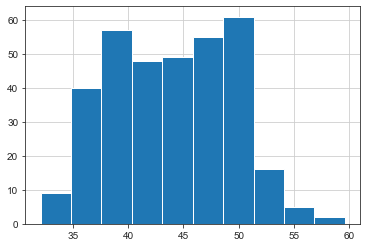

In [11]:
penguins_cs['culmen_length_mm'].hist()

### Learning on our dataset

#### Clustering

As you can see, this data is not readily adapted for clustering: many of the variables are non-numerical. We could try different strategies:

   - Getting rid of all non numerical variables
   - Converting categorical variables to a [one-hot vector](https://en.wikipedia.org/wiki/One-hot) to use them
   
We will try both approaches. Below is the code for the first approach, the second is yours to write. You can also update the first approach to fill n/a values with something better than $0$.

In [12]:
# set row with "." to NaN
penguins_cs.loc[mask_point,'sex'] = np.nan

In [65]:
penguins_num = penguins_cs[['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
penguins_num = penguins_num.dropna()

There exists two ways to remove  and handle NA values:
- Clustering the values and predicting the missing values
- Remove rows with null

The second approach will be selected since due to the high amount of data
this will not affect the results badly.



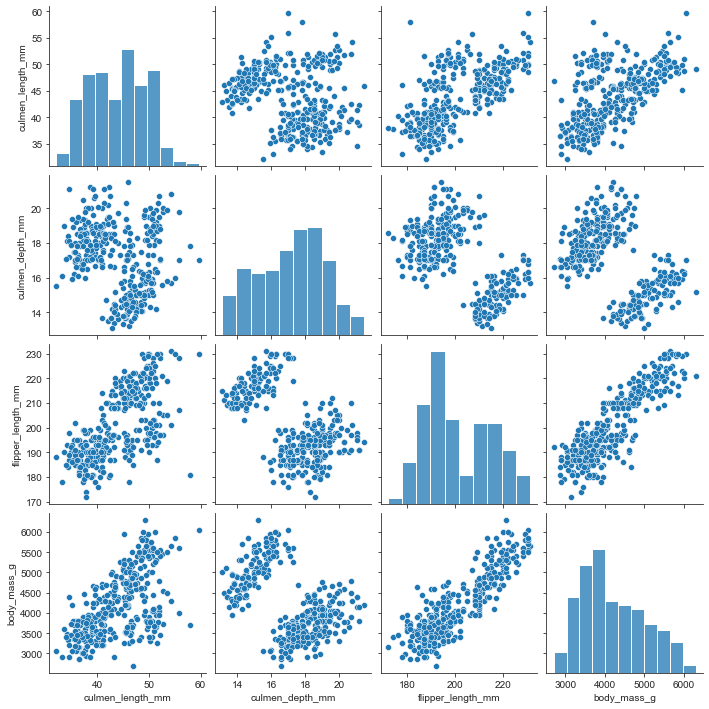

In [14]:
sns.set_style("ticks")
sns.pairplot(penguins_num)


In [15]:
penguins_one_hot = penguins_cs.copy()
penguins_one_hot = penguins_one_hot.join(pd.get_dummies(penguins_cs['species']))
penguins_one_hot = penguins_one_hot.join(pd.get_dummies(penguins_cs['island']))
di = {'MALE': 1, 'FEMALE': 0}
penguins_one_hot = penguins_one_hot.replace({"sex": di})
penguins_one_hot = penguins_one_hot.dropna()
penguins_one_hot = penguins_one_hot.drop(['species','island'],axis=1)
penguins_data = penguins_one_hot.copy()
penguins_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo,Biscoe,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,1.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0.0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0.0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0.0,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,0.0,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,1.0,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,0.0,0,0,1,1,0,0


#### $k$-means

Let us focus on the $k$-means clustering algorithm. Once trained, the labels (_i.e._ the cluster assignation) is in `kmeans_algo.labels_`, and the centroids are in `kmeans_algo.cluster_centers_`.

In [16]:
kmeans_algo = cluster.KMeans(n_clusters=3)
kmeans_results = kmeans_algo.fit_transform(penguins_num)

In [17]:
kmeans_algo.cluster_centers_

array([[  49.30655738,   15.64918033,  221.06557377, 5501.63934426],
       [  41.28470588,   18.05764706,  190.31764706, 3532.35294118],
       [  45.0018018 ,   16.58828829,  206.07207207, 4512.61261261]])

In [18]:
kmeans_algo.labels_

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,

Plot the data with colours for each cluster (in two dimensions).

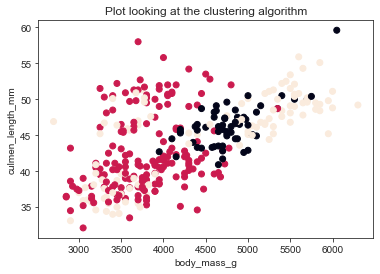

In [19]:
K_means_labels = pd.Series(kmeans_algo.labels_)
penguins_numK = penguins_num.copy()
penguins_numK['K_label'] = K_means_labels


_=plt.scatter(penguins_numK['body_mass_g'],penguins_numK['culmen_length_mm'],c=penguins_numK['K_label'])
_= plt.title('Plot looking at the clustering algorithm')
_= plt.xlabel('body_mass_g')
_= plt.ylabel('culmen_length_mm');

_= plt.show()

Comparing k-means with original result when trying to determine species

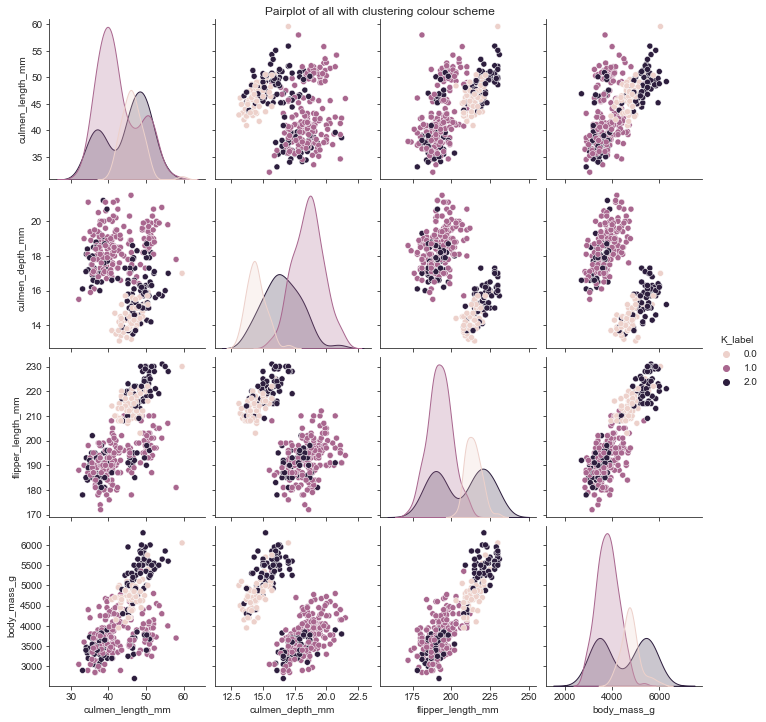

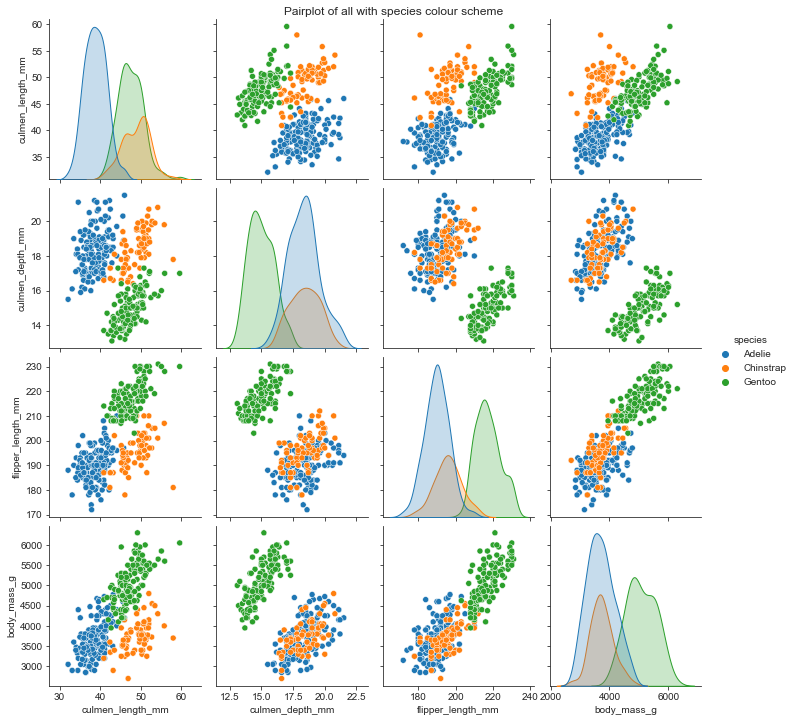

In [20]:

sns.set_style("ticks")
g = sns.pairplot(penguins_numK,hue='K_label')
_=g.fig.suptitle("Pairplot of all with clustering colour scheme", y=1.00)
penguins_num_with_species = penguins_cs[['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g','species']]
penguins_num_with_island = penguins_cs[['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g','island']]

g=sns.pairplot(penguins_num_with_species,hue='species')
_=g.fig.suptitle("Pairplot of all with species colour scheme", y=1.00)


**Finding the right $k$ with the elbow method**

Let us find the most appropriate value for $k$ using the "elbow" method. It consists in plotting, for multiple values of $k$, the global clustering score. While in theory the score can be anything you want, for today let us use the _distortion_. For a cluster $C$ with centroid $c$ and points $(x^{c}_i)_{i=0}$, its distortion $d(c)$ is the sum of the squared distances between the points and the centroid:

$ d(c) = \sum_i |x_i - c|^2,$

and the distortion of our $k$ clusters is the sum of distortions for each cluster. You can fill the list `elbow_scores` with the scores you will have computed.

In [21]:
penguins_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


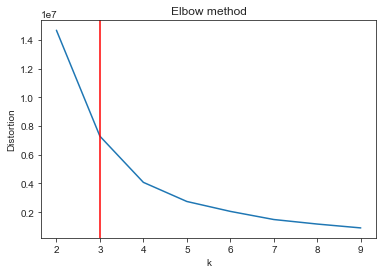

In [22]:
def distortion(data, clustering):
    mse = (np.square(data - clustering)).mean(axis=1).sum()
    return mse

min_k = 2
max_k = 10

X = penguins_num
elbow_scores = []
for k in list(range(min_k, max_k)):
    kmeans_algo = cluster.KMeans(n_clusters=k)
    kmeans_results = kmeans_algo.fit_transform(X)
    algo_centroid = np.empty([X.shape[0],X.shape[1]])
    for index, item in enumerate(kmeans_algo.labels_):
        algo_centroid[index] = (kmeans_algo.cluster_centers_[item])
    elbow_scores.append(distortion(X, algo_centroid))


plt.plot(list(range(min_k, max_k)), elbow_scores)
plt.axvline(x=3, color='r')
plt.title('Elbow method')
plt.xlabel("k")
plt.ylabel("Distortion");


#### Classification

While we have not seen any classification algorithms in class yet, let us try to classify (instead of cluster) our data. The code for the classification algorithm is already completely written out for you, so you can focus on the other tasks.

Start by choosing what you want to classify on (for example, the species). You can use the exploratory data analysis you did before to guide your choice.


In [23]:
def train_test_split(data: pd.DataFrame, target_key:str, percent_test: int =15):
    test = data.sample(frac=percent_test/100)
    train = data.drop(test.index)
    y_test = test[target_key]
    y_train = train[target_key]
    X_test = test.drop(target_key,axis=1)
    X_train = train.drop(target_key,axis=1)
    return X_train, y_train, X_test, y_test

data = penguins_num_with_species.dropna()
X_train, y_train, X_test, y_test = train_test_split(data, target_key="species")


In [24]:
penguins_num_with_species


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,NaN,NaN,NaN,NaN,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,Gentoo
340,46.8,14.3,215.0,4850.0,Gentoo
341,50.4,15.7,222.0,5750.0,Gentoo
342,45.2,14.8,212.0,5200.0,Gentoo


Check that your train and test set are appropriate. For example, is the repartition of the target variable similar? If not, how could you correct this issue?

In [25]:
unique, counts = np.unique(y_train, return_counts=True)
y_freq = pd.DataFrame(data=np.asarray((unique, counts/counts.sum())).T,
                  columns=["name", "frequency_train"])
y_freq = y_freq.set_index("name")

unique, counts = np.unique(y_test, return_counts=True)
y_test_freq = pd.DataFrame(data=np.asarray((unique, counts/counts.sum())).T,
                  columns=["name", "frequency_train"])
y_test_freq = y_test_freq.set_index("name")


y_freq = pd.merge(y_freq, y_test_freq ,left_index=True, right_index=True)
y_freq

,frequency_train_x,frequency_train_y
name,,
Adelie,0.439863,0.45098
Chinstrap,0.209622,0.137255
Gentoo,0.350515,0.411765


Looking at the above values show the proportion of target variable in the train test
are similar, this is due to the random sampling of the input.

If we were working with a particularly rare events if may have been necessary to split
the dataset into events and then select the train test percentage this was not neccessary in our case.


In [26]:
# Simple random forest code
from sklearn.ensemble import RandomForestClassifier

rf_species = RandomForestClassifier(n_estimators=50)
rf_species.fit(X_train, y_train)
y_pred = rf_species.predict(X_test)



RandomForestClassifier(n_estimators=50)

## Evaluation

Now it is time to focus on the evaluation of our models. Let us use this as an opportunity to compare the clustering and classification approaches.

   - How can we evaluate the quality of the clustering? Think about the ranking agreement metrics we saw in the first lecture
   - Can we look at the confusion matrix outputted by our classification algorithm?
   - How can we evaluate the quality of the classification? You can go read again about the F1-score and ROC curves

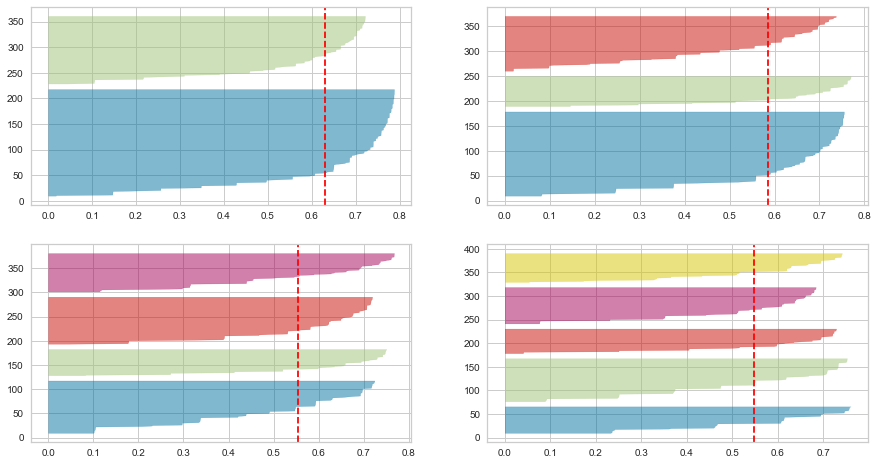

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    _=visualizer.fit(X)

The silhouette scores (ranging from 2 to 5 clusters) indicate that the choice of 3 clusters may
have been incorrect since a higher score is better, these graphs seem to indicate 2 is the optimal amount of clusters

original code from https://notebook.community/DistrictDataLabs/yellowbrick/examples/clustering_visualizers


In [28]:
rf_species = RandomForestClassifier(n_estimators=50)
rf_species.fit(X_train, y_train)
y_pred = rf_species.predict(X_test)
y_score = rf_species.predict_proba(X_test)

RandomForestClassifier(n_estimators=50)

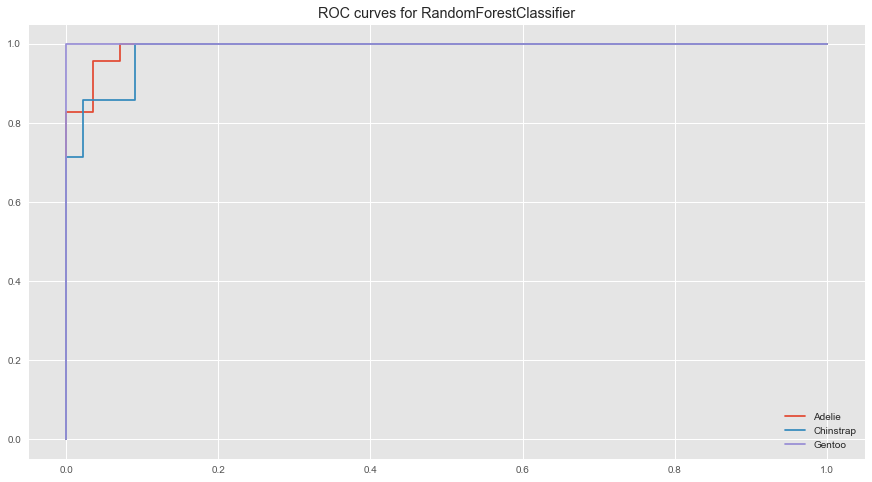

In [29]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
lookupTable, indexed_dataSet_test = np.unique(y_test, return_inverse=True)

fig = plt.figure(figsize=(15, 8))
plt.style.use('ggplot')

for i, classe in enumerate(np.unique(y_test)):
    fpr[classe], tpr[classe], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    _=plt.plot(fpr[classe], tpr[classe], label=classe)
_=plt.legend(loc="lower right")
_=plt.title("ROC curves for RandomForestClassifier")

/Users/oliviermaxwell/PycharmProjects/TelecomParis/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


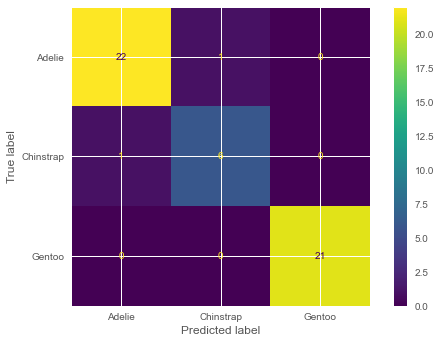

In [30]:
_ = plot_confusion_matrix(rf_species, X_test, y_test)

The classification for species is 100% accurate which explaines the right angle roc curve and
the perfect confusion matrix

RandomForestClassifier(n_estimators=50)

/Users/oliviermaxwell/PycharmProjects/TelecomParis/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


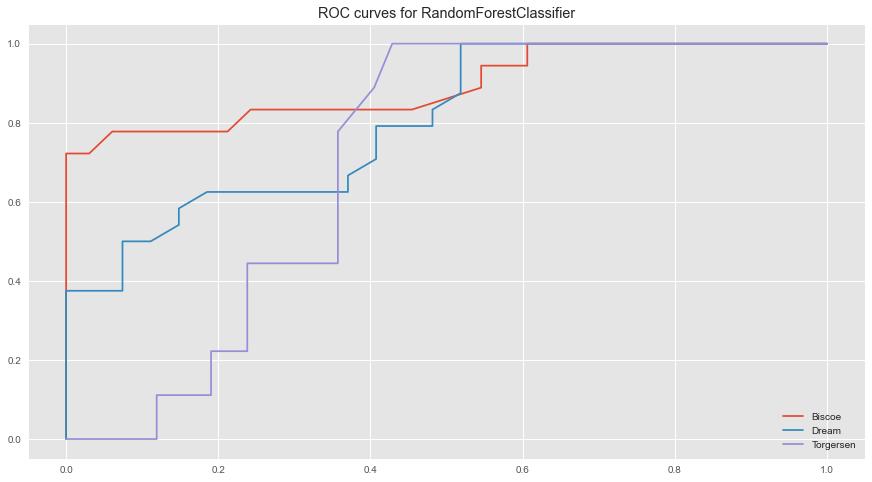

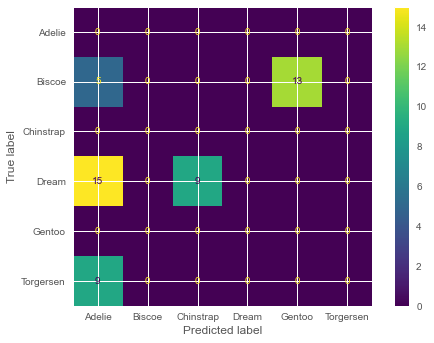

In [31]:

data = penguins_num_with_island.dropna()
X_train, y_train, X_test, y_test = train_test_split(data, target_key="island")

rf_island = RandomForestClassifier(n_estimators=50)
rf_island.fit(X_train, y_train)
y_pred = rf_island.predict(X_test)
y_score = rf_island.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
lookupTable, indexed_dataSet_test = np.unique(y_test, return_inverse=True)

fig = plt.figure(figsize=(15, 8))
plt.style.use('ggplot')

for i, classe in enumerate(np.unique(y_test)):
    fpr[classe], tpr[classe], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    _=plt.plot(fpr[classe], tpr[classe], label=classe)
_=plt.legend(loc="lower right")
_=plt.title("ROC curves for RandomForestClassifier")
_= plot_confusion_matrix(rf_species, X_test, y_test)

The classification for island not as accurate, this indicates the original data is not as easily predictable.
However it would seem than any other prediction than Adelie is more correct


## Implementing DBScan

For the last part of the lab, let us focus a little bit on implementation. Your goal is to reimplement a functional version of the [DBScan algorithm]() that we saw during the lecture. You will find below a skeleton of code that you can fill in.

Once you have a functional version (if you still have time), you can try to make your implementation faster, by thinking about the following questions:

   - Can the neighbourhood lookup be faster?
   - Can the $\mu$ parameter be implemented easily?
   - How can the scalability of the algorithm be tested?

resources used :<br>
-https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97<br>
-https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5

In [60]:
from  sklearn.cluster import dbscan as db

def check_core_point(eps,minPts, df: pd.DataFrame, index):
    #get points from given index
    point = df.loc[index]
    points_to_check = df.drop(index)

    dists = np.linalg.norm(points_to_check.to_numpy() - point.to_numpy(), axis=1)
    temp_df = pd.DataFrame(data=dists.T, index=points_to_check.index, columns=["distance"])
    neighbours_df = temp_df[temp_df["distance"]<=eps]
    num_neighbours = (dists<= eps).sum()
    #print(f"to mf check this out {num_neighbours}")
    #check how many points are present within radius
    if num_neighbours >= minPts:
        #return format (dataframe, is_core, is_border, is_noise)
        return list(neighbours_df.index) , True, False, False

    elif (num_neighbours < minPts) and num_neighbours > 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return list(neighbours_df.index) , False, True, False

    elif num_neighbours == 0:
        #return format (dataframe, is_core, is_border, is_noise)
        return None, False, False, True




def my_dbscan(orig_data: pd.DataFrame, epsilon: float, mu:int =1):

    data = orig_data.copy()
    points = len(data.index)

    if data.duplicated().sum()!=0:raise Exception('Duplicate index in Dataframe not authorised')

    points_to_check = list(data.index)

    cluster_assignement = {}
    cluster = 0

    while len(cluster_assignement) != points :
        #print(f"cluster_ass: {len(cluster_assignement)} points_to_check :{len(points_to_check)} ")

        point_index = points_to_check[random.randint(0, len(points_to_check)-1)]

        neighbours, is_core, is_border, is_noise = check_core_point(epsilon,mu, data, point_index)


        if is_core :

            cluster_assignement[point_index] = cluster
            points_to_check.remove(point_index)
            while len(neighbours) != 0:
                #print(f" c {cluster} :neighbours{neighbours}" )
                point_index = neighbours.pop()

                if point_index not in points_to_check:
                    continue

                new_neighbours, is_core, is_border, is_noise = check_core_point(epsilon,mu, data, point_index)

                if is_noise:raise Exception('cant be noise')
                if is_border:
                    cluster_assignement[point_index] = cluster
                    points_to_check.remove(point_index)
                if is_core:
                    cluster_assignement[point_index] = cluster
                    points_to_check.remove(point_index)
                    neighbours.extend(new_neighbours)

            cluster+=1

        if is_noise :
            cluster_assignement[point_index] = -1
            points_to_check.remove(point_index)

        if is_border :
            cluster_assignement[point_index] = -1


    return pd.Series(cluster_assignement,index=cluster_assignement.keys())

Select the optimal paramters for dbscan


d'apres
https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

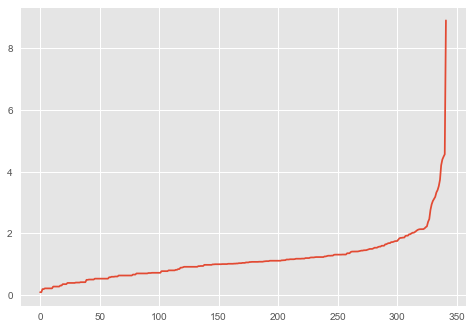

In [61]:
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(penguins_num)
distances, indices = neighbors_fit.kneighbors(penguins_num)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [70]:
penguins_num = penguins_num.drop('body_mass_g',axis=1)

In [72]:
penguins_num = penguins_num.dropna()
penguins_num = penguins_num.drop_duplicates()

my_clustering = my_dbscan(penguins_num, 4, 8)
my_clustering = pd.DataFrame(my_clustering, columns = ['z'])
my_sol = pd.merge(penguins_num, my_clustering,left_index=True, right_index=True)
fig = px.scatter_3d(my_sol,
                 y="culmen_length_mm",
                 x="culmen_depth_mm",
                 z="flipper_length_mm",
                 color="z")
#fig.update_layout(layout)
fig.show()

clustering = DBSCAN(eps=4, min_samples=8).fit(penguins_num)
X_tran_db = penguins_num.copy()
X_tran_db['z'] = clustering.labels_
fig = px.scatter_3d(X_tran_db,
                 y="culmen_length_mm",
                 x="culmen_depth_mm",
                 z="flipper_length_mm",
                 color="z")
fig.show()


To test the algorithm the column body_mass_g was removed to enable 3 dimension visualisation.

We can notice that our imlpementation and the scikit learn achieve the exact same solution.

To emphasis this point further both algorithms are tested on artificial data below


In [73]:

num_samples_total = 500
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 13

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)


syn_df = pd.DataFrame(X, columns = ['x', 'y'])


my_clustering = my_dbscan(syn_df , 0.5, 4)
my_clustering = pd.DataFrame(my_clustering, columns = ['z'])
my_sol = pd.merge(syn_df, my_clustering,left_index=True, right_index=True)


clustering = DBSCAN(eps=0.5, min_samples=4).fit(X)
syn_df['z'] = clustering.labels_#y


fig = px.scatter(syn_df, y="y", x="x", color="z")
fig.show()
fig = px.scatter(my_sol, y="y", x="x", color="z")
fig.show()